# Towards a data analytics solution to choose the least crime route on a given day.

The most interesting things about crime in my opinion are : when do we expect it to occur and where do we expect it to occur. In a sense, if we could predict these two variables, we can in principle create "pre-cog" from the minority report. The fine grained detail shown in the movie is perhaps very far, but at a high level, data analytics can point out patterns of crime. This would help in preventing some types of crime. For instance, if we knew before hand that in a certain locality DUIs increase on Fridays, we can initiate a Breathalyzer campaign in those places on Fridays. A more fine grained analysis can point out the time of day that most DUIs occur which gives even more precision to our predictions. To begin with, given below is a graph of the total crimes in the San Francisco area for the summer of 2014. Note that for this graph, I have removed both the "OTHER OFFENCES" and "NON-CRIMINAL" activities. Most of the "NON-CRIMINAL" activities are actually reports of missing items which may very well point out theft (more on this later). 


So, the first question I would like to ask is:

# Which day of the week is most likely to result in a particular crime?

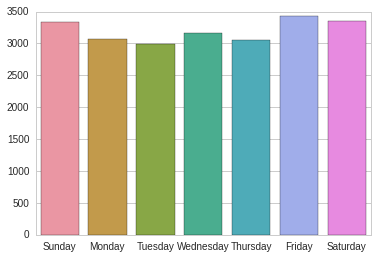

In [1]:
import seaborn as sns
import numpy as np

%matplotlib inline

week_cnt = {}
crime_cnt = {}

sns.set_style("whitegrid")
fil = open("sanfrancisco_incidents_summer_2014.csv")
for lin in fil.readlines()[1:]:
    flds = lin.strip().split(",")
    if("OTHER OFFENSES" not in lin and "NON-CRIMINAL" not in lin):
        if(flds[3] in week_cnt):
            week_cnt[flds[3]] += 1.0
        else:
            week_cnt[flds[3]] = 1.0
days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
vals = [week_cnt[x] for x in days]

ax = sns.barplot(x=days, y=vals)
sns.plt.show()

From the graph, crime seems to be equally distributed on all days of the week. There is a slight increase in the crimes on Friday (party time for the criminals I guess). It is also important to check what kinds of crime are being committed to get a better understanding of whats happening. For instance, are the Friday night crimes of the "Drunken driving" kind? Or are they assualts? Which of the crime types vary most by the day of the week? 

For the San Francisco crime data, there are 34 different categories. The total counts for each type are given below:

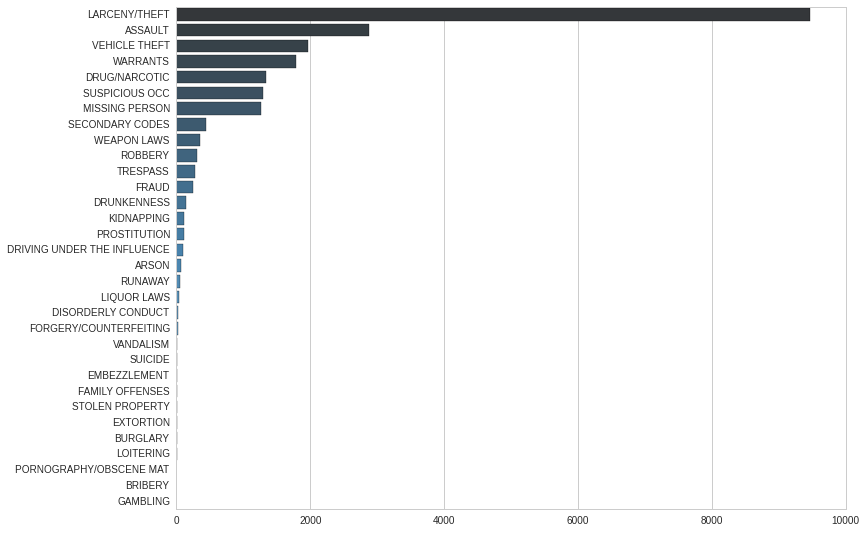

In [2]:
import seaborn as sns
import matplotlib as plt
import operator

%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 9)

crime_cnt = {}
sns.set_style("whitegrid")
fil = open("sanfrancisco_incidents_summer_2014.csv")
for lin in fil.readlines()[1:]:
    flds = lin.strip().split(",")
    if("OTHER OFFENSES" not in lin and "NON-CRIMINAL" not in lin):
        if(flds[1] in crime_cnt): 
            crime_cnt[flds[1]] += 1.0
        else:
            crime_cnt[flds[1]] = 1.0
sorted_x = sorted(crime_cnt.items(), key=operator.itemgetter(1), reverse=True)
crime_names = [x[0] for x in sorted_x]
crime_vals = [x[1] for x in sorted_x]

ax = sns.barplot(y=crime_names, x=crime_vals, palette="Blues_d")
sns.plt.show()

As can be seen from the graph above, larceny/theft is the most occurring crime in San Francisco. Assault is the second and vehicle theft and warrants come a close third and fourth. The drug/narcotic crimes are not as common as theft which was quite interesting to me. Perhaps most drug/narcotic related crimes are never caught and happen at home. It is also disturbing that there are quite a lot of missing person reports. 

To inch a bit closer to the "pre-cog" from Minority report, we can plot weekday plots to see which if them show highest variation with the weekday/weekend trends. This will help us ask the question, "which day does a particular crime occur the most?" I have selected "Larceny/Theft", "Drug/narcotic" "Warrants" and "Driving under the influence" to illustrate this point.

### Larceny
Below is the weekday plot for Larceny. It is clear from this, that most larceny/theft occurs on Weekends. Why is this so? One reason may be that most people committing these crimes themselves have weekday jobs.

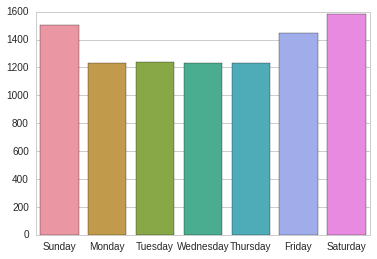

In [3]:
import seaborn as sns
import numpy as np

%matplotlib inline

week_cnt = {}
crime_cnt = {}

sns.set_style("whitegrid")
fil = open("sanfrancisco_incidents_summer_2014.csv")
for lin in fil.readlines()[1:]:
    flds = lin.strip().split(",")
    if("LARCENY/THEFT" in lin):
        if(flds[3] in week_cnt):
            week_cnt[flds[3]] += 1.0
        else:
            week_cnt[flds[3]] = 1.0
days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
vals = [week_cnt[x] for x in days]

ax = sns.barplot(x=days, y=vals)
sns.plt.show()

### Drug/Narcotics
Below is the weekday plot for Drug/Narcotics. This one surprised me a lot. Why do drug/narcotics related crimes occur more often on the weekdays? Of course, since these numbers are for crimes reported/noted by cops, one possibility is during weekdays there are more cops patrolling and not responding to 911 calls, so more narcotics crimes are caught maybe during traffic stops or others. Again, there is no data to prove this conjecture, but surprising results like these can often be most useful for predicting crime / crime reporting.

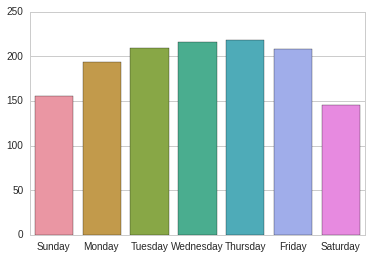

In [4]:
import seaborn as sns
import numpy as np

%matplotlib inline

week_cnt = {}
crime_cnt = {}

sns.set_style("whitegrid")
fil = open("sanfrancisco_incidents_summer_2014.csv")
for lin in fil.readlines()[1:]:
    flds = lin.strip().split(",")
    if("DRUG/NARCOTIC" in lin):
        if(flds[3] in week_cnt):
            week_cnt[flds[3]] += 1.0
        else:
            week_cnt[flds[3]] = 1.0
days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
vals = [week_cnt[x] for x in days]

ax = sns.barplot(x=days, y=vals)
sns.plt.show()

### Warrants
Below is the weekday plot for Warrants. Similar to Drug/Narcotics, warrants seem to occur more during the weekdays rather than weekends.

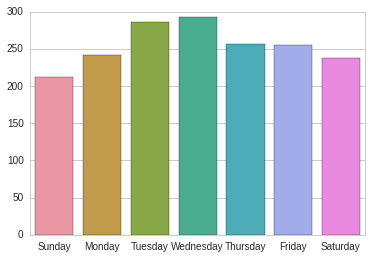

In [5]:
import seaborn as sns
import numpy as np

%matplotlib inline

week_cnt = {}
crime_cnt = {}

sns.set_style("whitegrid")
fil = open("sanfrancisco_incidents_summer_2014.csv")
for lin in fil.readlines()[1:]:
    flds = lin.strip().split(",")
    if("WARRANTS" in lin):
        if(flds[3] in week_cnt):
            week_cnt[flds[3]] += 1.0
        else:
            week_cnt[flds[3]] = 1.0
days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
vals = [week_cnt[x] for x in days]

ax = sns.barplot(x=days, y=vals)
sns.plt.show()

### DUI
Below is the weekday plot for DUIs. DUIs in this time period show a very marked weekend dependence. Not surprising as most people are chilling out with a beer or two with friends, and the chances of getting caught are high. 

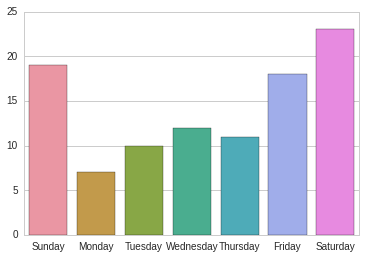

In [6]:
import seaborn as sns
import numpy as np

%matplotlib inline

week_cnt = {}
crime_cnt = {}

sns.set_style("whitegrid")
fil = open("sanfrancisco_incidents_summer_2014.csv")
for lin in fil.readlines()[1:]:
    flds = lin.strip().split(",")
    if("DRIVING UNDER THE INFLUENCE" in lin):
        if(flds[3] in week_cnt):
            week_cnt[flds[3]] += 1.0
        else:
            week_cnt[flds[3]] = 1.0
days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
vals = [week_cnt[x] for x in days]

ax = sns.barplot(x=days, y=vals)
sns.plt.show()

# Where are the crimes occurring?

I have visualized the crimes occurring in San Francisco on a map of the city. This will help us in understanding the location of the crimes according to crime type. Since the data is huge and will take a long time to render, I will show the location maps for only the crimes given above (larceny/theft, drug/narcotics, warrants and DUIs). The maps given below are zoomable and the numbers shown are clusters of reports. For instance, zooming in to a region, breaks the cluster and shows sub-clusters of crime reports. At the highest level of zoom, each crime can be individually seen. The colors shown are green for 0-10 reports in that area, yellow for 10-100 and red for > 100. Since it takes a while for the output, please check if it shows (Busy) in the title bar. Please wait till the maps appear below.

In both cases, we can see that the eastern area around the Great Highway is relatively crime free. So, armed with the location and time, in principle, one can visualize thorughout the day, which areas and which times are the most crime ridden. In a manner of speaking, one can even begin a crime-free street view much like Google maps traffic predictions. High crime streets at a given time can be colored red (like in the map shown below) and areas and time combinations can be colored yellow or green to provide you safe paths. 

In [7]:
from IPython.display import HTML
import folium
import pandas as pd
from folium.plugins import MarkerCluster
import os

if not os.path.exists("theft.html"):
    SF_COORDINATES = (37.76, -122.45)
    crimedata = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

    # create empty map zoomed in on San Francisco
    mapa = folium.Map(location=SF_COORDINATES, zoom_start=12, tiles="Cartodb Positron")

    # add a marker for every record in the filtered data, use a clustered view
    locations = []
    popups = []
    for each in crimedata.iterrows():
        if("LARCENY/THEFT" in each[1]['Category']):
            locations.append([each[1]['Y'],each[1]['X']])
    t = folium.FeatureGroup(name='Larceny/Theft')
    t.add_children(MarkerCluster(locations=locations))
    mapa.add_children(t)
    mapa.create_map("theft.html")
HTML('<iframe src="theft.html" style="width: 100%; height: 510px; border: none"></iframe>')


### DUIs

In [8]:
from IPython.display import HTML
import folium
import pandas as pd
from folium.plugins import MarkerCluster
import os

if not os.path.exists("dui.html"):
    SF_COORDINATES = (37.76, -122.45)
    crimedata = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

    # create empty map zoomed in on San Francisco
    mapa = folium.Map(location=SF_COORDINATES, zoom_start=12, tiles="Cartodb Positron")

    # add a marker for every record in the filtered data, use a clustered view
    locations = []
    popups = []
    for each in crimedata.iterrows():
        if("DRIVING UNDER THE INFLUENCE" in each[1]['Category']):
            locations.append([each[1]['Y'],each[1]['X']])
    t = folium.FeatureGroup(name='Larceny/Theft')
    t.add_children(MarkerCluster(locations=locations))
    mapa.add_children(t)
    mapa.create_map("dui.html")
HTML('<iframe src="./dui.html" style="width: 100%; height: 510px; border: none"></iframe>')


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: Map.create_map is deprecated. Use Map.save instead
